In [2]:
from google.colab import files
uploaded = files.upload()

for fn in uploaded.keys():
  print('user uploades file"(name)" with length{length} bytes'.format(name=fn, length=len(uploaded[fn])))

Saving spam.csv to spam.csv
user uploades file"(name)" with length503663 bytes


In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from keras.models import Model
from keras.layers import LSTM,Activation,Dense,Dropout,Input,Embedding
from keras.optimizers import RMSprop
from keras.preprocessing.text import Tokenizer
from keras.preprocessing import sequence
from keras.utils import to_categorical
from keras.callbacks import EarlyStopping
%matplotlib inline

df = pd.read_csv('spam.csv', delimiter=',',encoding ='latin-1')
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


Text(0.5, 1.0, 'Number of ham and spam messages')

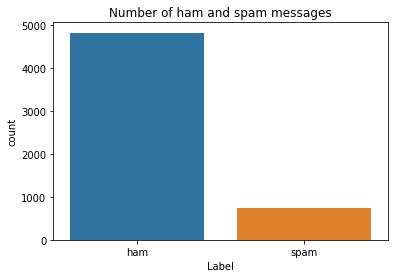

In [5]:
sns.countplot(df.v1)
plt.xlabel('Label')
plt.title('Number of ham and spam messages')



In [0]:
X= df.v2
Y =df.v1
le = LabelEncoder()
Y = le.fit_transform(Y)
Y = Y.reshape(-1,1)

In [0]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.15)

In [0]:
maz_words = 1000
max_len =150
tok = Tokenizer(num_words=maz_words)
tok.fit_on_texts(X_train)
sequences = tok.texts_to_sequences(X_train)
sequences_matrix = sequence.pad_sequences(sequences,maxlen=max_len)


In [0]:
def RNN():
  inputs = Input(name='inputs',shape=[max_len])
  layer = Embedding(maz_words,50,input_length=max_len)(inputs)
  layer = LSTM(64)(layer)
  layer = Dense(256,name='FC1')(layer)
  layer = Activation('relu')(layer)
  layer = Dropout(0.5)(layer)
  layer = Dense(1,name='out_layer')(layer)
  layer = Activation('sigmoid')(layer)
  model = Model(inputs = inputs, outputs= layer)
  return model


In [28]:
model = RNN()
model.summary()
model.compile(loss = 'binary_crossentropy',optimizer=RMSprop(),metrics=['accuracy'])

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
inputs (InputLayer)          (None, 150)               0         
_________________________________________________________________
embedding_1 (Embedding)      (None, 150, 50)           50000     
_________________________________________________________________
lstm_1 (LSTM)                (None, 64)                29440     
_________________________________________________________________
FC1 (Dense)                  (None, 256)               16640     
_________________________________________________________________
activation_1 (Activation)    (None, 256)               0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 256)               0         
_________________________________________________________________
out_layer (Dense)            (None, 1)                 257 

In [30]:
model.fit(sequences_matrix,Y_train,batch_size=128,epochs=10,
          validation_split=0.2,callbacks=[EarlyStopping(monitor='val_loss',min_delta=0.0001)])

/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/indexed_slices.py:434: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "


Train on 3788 samples, validate on 948 samples
Epoch 1/10
3788/3788 [==============================] - 8s 2ms/step - loss: 0.3194 - accuracy: 0.8854 - val_loss: 0.1295 - val_accuracy: 0.9641
Epoch 2/10
3788/3788 [==============================] - 7s 2ms/step - loss: 0.0940 - accuracy: 0.9765 - val_loss: 0.0541 - val_accuracy: 0.9831
Epoch 3/10
3788/3788 [==============================] - 7s 2ms/step - loss: 0.0496 - accuracy: 0.9871 - val_loss: 0.0328 - val_accuracy: 0.9895
Epoch 4/10
3788/3788 [==============================] - 7s 2ms/step - loss: 0.0349 - accuracy: 0.9892 - val_loss: 0.0309 - val_accuracy: 0.9895
Epoch 5/10
3788/3788 [==============================] - 7s 2ms/step - loss: 0.0278 - accuracy: 0.9910 - val_loss: 0.0479 - val_accuracy: 0.9831


In [31]:
test_sequences = tok.texts_to_sequences(X_test)
test_sequences_matrix = sequence.pad_sequences(test_sequences,maxlen=max_len)
acc = model.evaluate(test_sequences_matrix,Y_test)

836/836 [==============================] - 0s 580us/step


In [32]:
print('Test set\n  Loss:{:0.3f}\n  Accuracy:{:0.3f}'.format(acc[0],acc[1]))

Test set
  Loss:0.066
  Accuracy:0.978


In [0]:
testing_context = ["oh k...i'm watching here:)"]

text = tok.texts_to_sequences(testing_context)
text = sequence.pad_sequences(text,maxlen=max_len)

In [37]:
preds = model.predict(text)
print(preds)

[[4.0437953e-05]]
